# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [80]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [3]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [4]:
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
websites.shape

(1781, 21)

In [6]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1781 non-null   object 
 4   SERVER                     1780 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1781 non-null   object 
 7   WHOIS_STATEPRO             1781 non-null   object 
 8   WHOIS_REGDATE              1781 non-null   object 
 9   WHOIS_UPDATED_DATE         1781 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [8]:
websites.Type.value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [9]:
websites.sample(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1095,B0_98,56,11,utf-8,nginx/1.6.3 + Phusion Passenger,NaN,None,None,20/04/2001 0:00,22/05/2015 0:00,...,2,3,1256,14,14,1546,1576,14,4.0,0
1306,B0_2134,66,11,UTF-8,NaN,9405.0,US,District of Columbia,1/02/2003 16:44,2/02/2017 17:11,...,2,4,1026,15,4,246,1026,15,0.0,0
1676,B0_114,105,21,UTF-8,Apache,26857.0,US,MO,3/09/1996 0:00,8/12/2016 0:00,...,3,4,3238,43,44,26870,3550,43,4.0,0
585,M0_47,42,10,ISO-8859-1,Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL...,2516.0,US,Utah,24/05/2000 0:00,25/05/2016 0:00,...,0,2,4035,30,25,12416,4499,30,6.0,1
469,B0_253,39,8,ISO-8859-1,Apache,1002.0,AT,Austria,1/06/2004 0:00,2/06/2016 0:00,...,2,7,927,14,20,2926,1241,14,4.0,0
1573,B0_672,89,15,utf-8,Apache,19856.0,US,NY,18/01/1994 0:00,21/10/2016 0:00,...,58,6,6789,79,89,110553,7245,79,6.0,0
966,B0_2109,52,10,UTF-8,Apache-Coyote/1.1,NaN,US,NJ,2/03/1995 0:00,30/06/2016 0:00,...,3,3,486,5,7,436,486,5,0.0,0
902,B0_2132,50,9,utf-8,Server,NaN,US,CA,9/12/2002 0:00,2/05/2014 0:00,...,3,3,498,5,6,372,498,5,0.0,0
1521,M4_64,83,17,utf-8,Microsoft-IIS/6.0,NaN,US,California,18/06/2003 0:00,14/06/2016 0:00,...,1,1,90,1,5,416,90,1,0.0,1
1158,B0_1269,59,11,ISO-8859-1,nginx,162.0,US,Virginia,23/03/1998 0:00,29/05/2015 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [10]:
# The columns containing the features of the websites are URL, URL_LENGTH, # OF SPECIAL CHARACTERS & THE CHARSET

In [11]:
# The column containing the feature we will predict is the URL column, if the string starts with B it is benign, if it starts with M it is malicious


#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [12]:
corr = websites.corr()
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


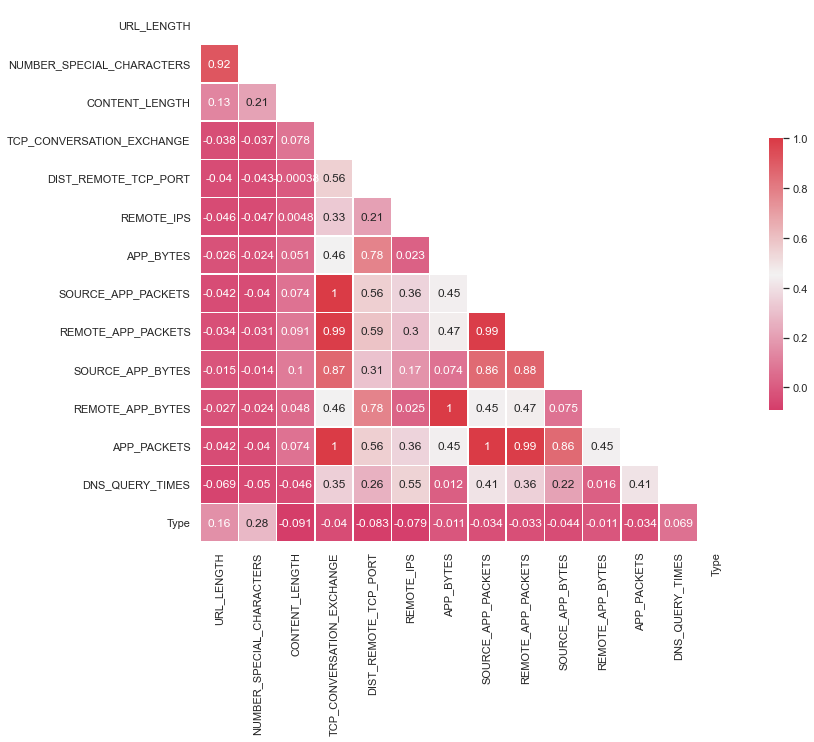

In [13]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True
);

In [14]:
# Columns to remove due to high collinearity (1 in some cases): TCP_CONVERSATION_EXCHANGE, REMOTE & SOURCE APP_PACKETS

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [15]:
websites.drop(columns = ['TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS'], axis=1, inplace=True)

In [16]:
corr2 = websites.corr()
corr2

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.039839,-0.046367,-0.026446,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,-0.000381,0.004774,0.051202,0.100094,0.047595,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.210188,1.000000,0.023126,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.780238,0.023126,1.000000,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.313359,0.171651,0.074464,1.000000,0.075328,0.857495,0.215285,-0.043852
REMOTE_APP_BYTES,-0.026686,-0.024098,0.047595,0.781212,0.025324,0.999992,0.075328,1.000000,0.447448,0.016215,-0.011004
APP_PACKETS,-0.042264,-0.040096,0.074142,0.558612,0.361104,0.445822,0.857495,0.447448,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.068582,-0.050048,-0.045644,0.259942,0.548189,0.012221,0.215285,0.016215,0.410843,1.000000,0.068753


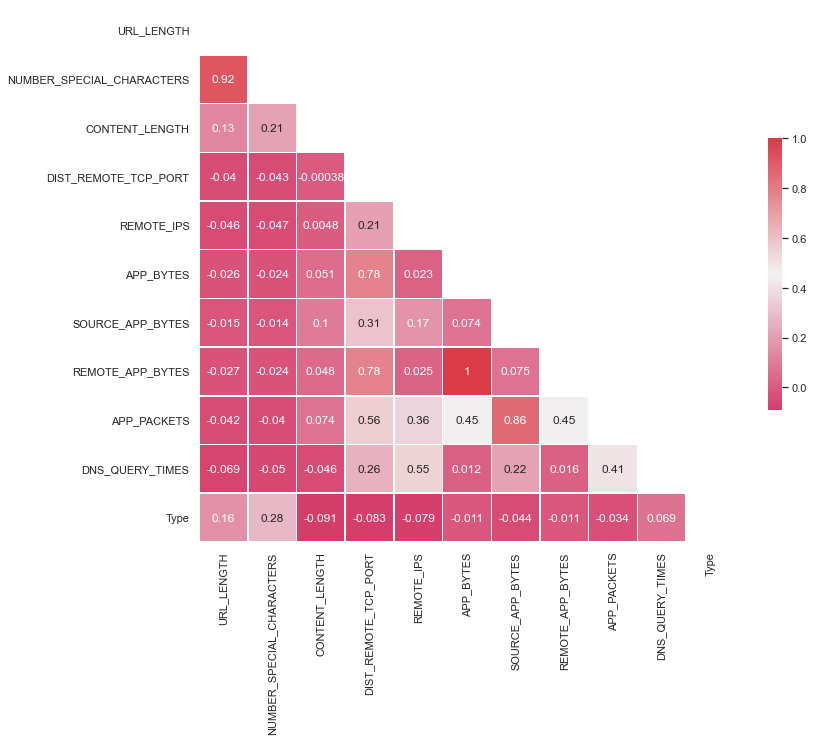

In [17]:
mascara = np.triu(np.ones_like(corr2, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corr2,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True
);

In [18]:
websites.drop(columns = ['URL_LENGTH', 'REMOTE_APP_BYTES'], axis=1, inplace=True)

In [19]:
corr3 = websites.corr()
corr3

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
NUMBER_SPECIAL_CHARACTERS,1.000000,0.214225,-0.042619,-0.047103,-0.023914,-0.014376,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.214225,1.000000,-0.000381,0.004774,0.051202,0.100094,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.042619,-0.000381,1.000000,0.210188,0.780238,0.313359,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.047103,0.004774,0.210188,1.000000,0.023126,0.171651,0.361104,0.548189,-0.078783
APP_BYTES,-0.023914,0.051202,0.780238,0.023126,1.000000,0.074464,0.445822,0.012221,-0.011262
SOURCE_APP_BYTES,-0.014376,0.100094,0.313359,0.171651,0.074464,1.000000,0.857495,0.215285,-0.043852
APP_PACKETS,-0.040096,0.074142,0.558612,0.361104,0.445822,0.857495,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.050048,-0.045644,0.259942,0.548189,0.012221,0.215285,0.410843,1.000000,0.068753
Type,0.280897,-0.090852,-0.082925,-0.078783,-0.011262,-0.043852,-0.034414,0.068753,1.000000


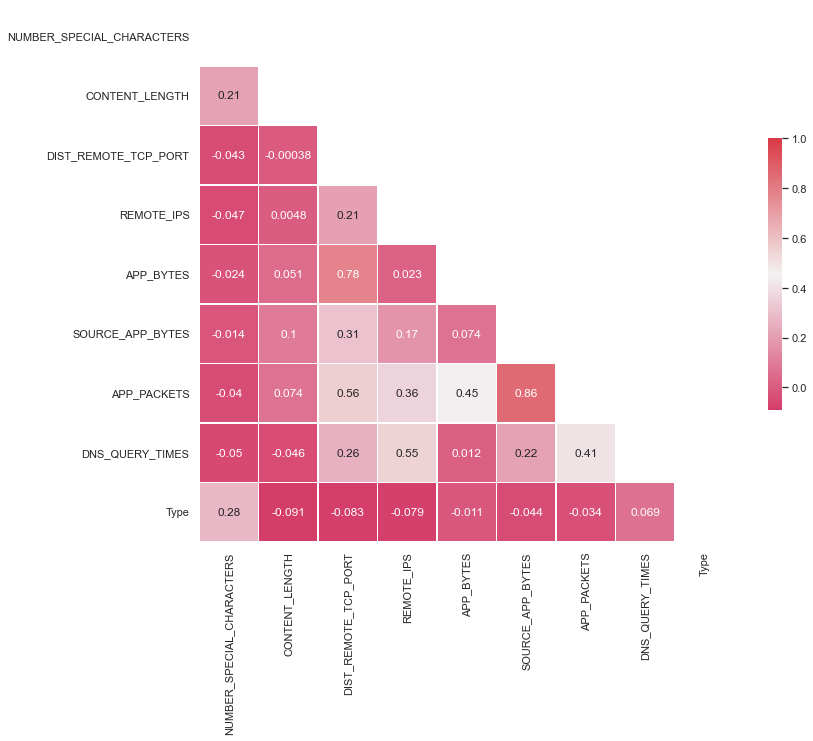

In [20]:
mascara = np.triu(np.ones_like(corr3, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corr3,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5}, 
            annot = True
);

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [21]:
websites.isnull().sum()

URL                            0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         1
CONTENT_LENGTH               812
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                  0
WHOIS_UPDATED_DATE             0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [22]:
"""Looking at the above it looks like we could drop the CONTENT_LENGTH column as it has multiple NaN values, however if we look at the correlation matrix, it is the second most correlated variable to Type which is what we want to understand, so it might be good to keep it."""

'Looking at the above it looks like we could drop the CONTENT_LENGTH column as it has multiple NaN values, however if we look at the correlation matrix, it is the second most correlated variable to Type which is what we want to understand, so it might be good to keep it.'

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [23]:
#websites['CONTENT_LENGTH'].unique()

In [24]:
websites['CONTENT_LENGTH'].mean()

11726.927760577915

In [25]:
websites['CONTENT_LENGTH'].max()

649263.0

In [26]:
websites['CONTENT_LENGTH'].min()

0.0

In [27]:
websites['CONTENT_LENGTH'].mode()

0    324.0
dtype: float64

In [28]:
websites['CONTENT_LENGTH'].median()

1853.0

<AxesSubplot:xlabel='CONTENT_LENGTH'>

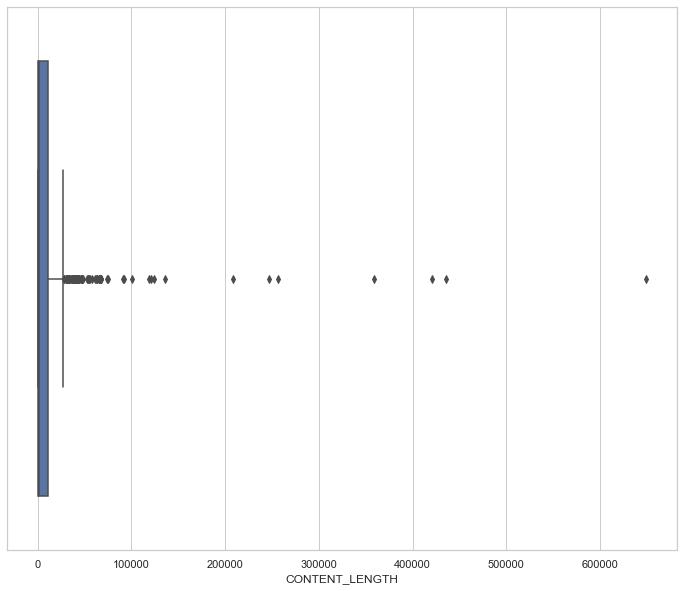

In [29]:
sns.boxplot(x='CONTENT_LENGTH', data=websites)

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CONTENT_LENGTH', ylabel='Density'>

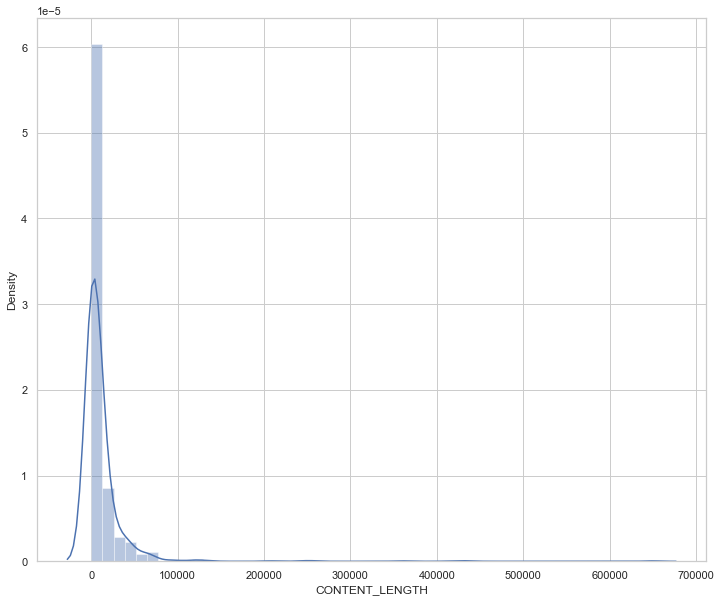

In [30]:
sns.distplot(websites['CONTENT_LENGTH'])

In [31]:
""" To understand how I am going to complete the missing values, I have looked at the metrics above with the help of the graphs.
Looking at it, it looks like the median would be the best metric as there are too many outliers in the sample as shown in the boxplot above and the median it is within the part where most numbers are. 
"""

' To understand how I am going to complete the missing values, I have looked at the metrics above with the help of the graphs.\nLooking at it, it looks like the median would be the best metric as there are too many outliers in the sample as shown in the boxplot above and the median it is within the part where most numbers are. \n'

In [32]:
websites['CONTENT_LENGTH'].fillna(websites['CONTENT_LENGTH'].median(), inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [33]:
websites.isnull().sum() # there is one row with no values on server or dns, but it looks it will not affect my data so I would just leave them

URL                          0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       1
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              1
Type                         0
dtype: int64

In [34]:
websites.dropna(axis=0, how='any', thresh=None, inplace=True)

In [35]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1779 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1779 non-null   object 
 1   NUMBER_SPECIAL_CHARACTERS  1779 non-null   int64  
 2   CHARSET                    1779 non-null   object 
 3   SERVER                     1779 non-null   object 
 4   CONTENT_LENGTH             1779 non-null   float64
 5   WHOIS_COUNTRY              1779 non-null   object 
 6   WHOIS_STATEPRO             1779 non-null   object 
 7   WHOIS_REGDATE              1779 non-null   object 
 8   WHOIS_UPDATED_DATE         1779 non-null   object 
 9   DIST_REMOTE_TCP_PORT       1779 non-null   int64  
 10  REMOTE_IPS                 1779 non-null   int64  
 11  APP_BYTES                  1779 non-null   int64  
 12  SOURCE_APP_BYTES           1779 non-null   int64  
 13  APP_PACKETS                1779 non-null   int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [36]:
websites['WHOIS_COUNTRY'].unique()

array(['None', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'se', 'IN',
       'LU', 'TH', "[u'GB'; u'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SE',
       'SI', 'IL', 'ru', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV',
       'DE', 'ES', 'BR', 'us', 'KR', 'HK', 'UA', 'CH', 'United Kingdom',
       'BS', 'PK', 'IT', 'Cyprus', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

In [37]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].str.upper()

In [38]:
websites['WHOIS_COUNTRY'].unique()

array(['NONE', 'US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN',
       'LU', 'TH', "[U'GB'; U'UK']", 'FR', 'NL', 'UG', 'JP', 'CN', 'SI',
       'IL', 'KY', 'AT', 'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES',
       'BR', 'KR', 'HK', 'UA', 'CH', 'UNITED KINGDOM', 'BS', 'PK', 'IT',
       'CYPRUS', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [39]:
websites['WHOIS_COUNTRY'].replace({"[U'GB'; U'UK']": 'UK', "UNITED KINGDOM": 'UK', 'CYPRUS': 'CY', 'GB': 'UK'}, inplace=True)

In [40]:
websites['WHOIS_COUNTRY'].value_counts()

US      1105
NONE     306
CA        83
ES        63
UK        35
AU        35
PA        21
JP        11
CN        10
IN        10
FR         9
CZ         9
NL         6
CH         6
RU         6
KR         5
AT         4
SE         4
BS         4
PH         4
BE         3
HK         3
TR         3
DE         3
KY         3
SC         3
UA         2
CY         2
UY         2
KG         2
BR         2
NO         2
IL         2
SI         2
LV         1
PK         1
IT         1
LU         1
BY         1
AE         1
IE         1
UG         1
TH         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

/opt/homebrew/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='WHOIS_COUNTRY', ylabel='count'>

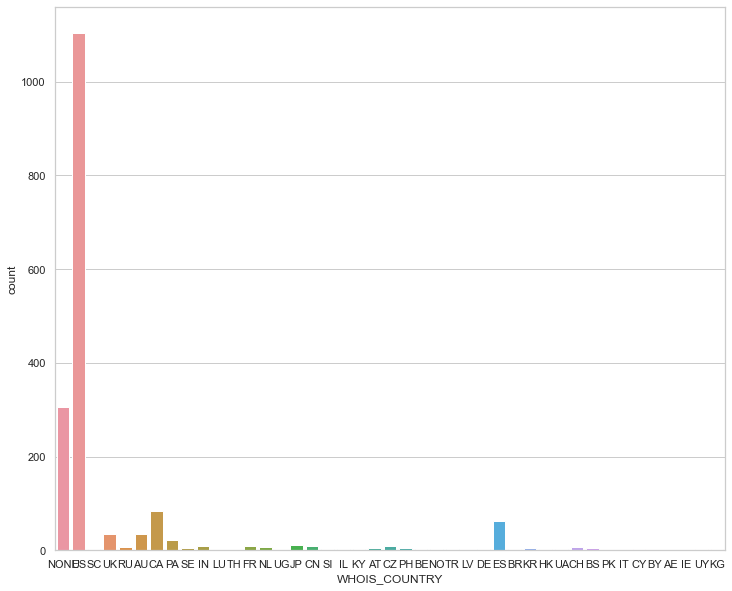

In [41]:
sns.countplot(websites['WHOIS_COUNTRY'])

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [42]:
other = (websites['WHOIS_COUNTRY'].value_counts()<11)

In [43]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: "OTHER" if other.loc[x] == True else x)

In [44]:
websites['WHOIS_COUNTRY'].value_counts()

US       1105
NONE      306
OTHER     120
CA         83
ES         63
UK         35
AU         35
PA         21
JP         11
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [45]:
websites.drop(columns = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

In [46]:
websites.sample(5)

,URL,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
100,B0_453,6,UTF-8,Apache/2.4.25,7967.0,NONE,0,4,631,812,8,2.0,0
996,B0_2268,9,UTF-8,Apache/2.2.21 (Unix) mod_ssl/2.2.21 OpenSSL/0....,2023.0,US,3,3,960,1024,12,0.0,0
444,B0_1344,7,UTF-8,Apache,1853.0,US,0,0,0,0,0,0.0,0
1456,B0_2174,13,ISO-8859-1,Apache,1853.0,US,7,9,1206,991,17,0.0,0
659,M0_49,10,ISO-8859-1,Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL...,2516.0,US,0,2,3444,9819,28,6.0,1


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [47]:
websites.dtypes

URL                           object
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [48]:
websites.drop(columns = ['URL'], axis=1, inplace=True)

In [49]:
websites.head()

,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,7,iso-8859-1,nginx,263.0,NONE,0,2,700,1153,9,2.0,1
1,6,UTF-8,Apache/2.4.10,15087.0,NONE,7,4,1230,1265,17,0.0,0
2,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NONE,0,0,0,0,0,0.0,0
3,6,ISO-8859-1,nginx,162.0,US,22,3,3812,18784,39,8.0,0
4,6,UTF-8,None,124140.0,US,2,5,4278,129889,61,4.0,0


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [50]:
websites['CHARSET'].unique()

array(['iso-8859-1', 'UTF-8', 'us-ascii', 'ISO-8859-1', 'utf-8', 'None',
       'windows-1251', 'ISO-8859', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [51]:
websites['SERVER'].unique()

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'None',
       'Apache/2', 'nginx/1.10.1', 'Apache', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips'

![Think Hard](../think-hard.jpg)

In [52]:
# I would take the first word of each name to divide the server.


Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [53]:
websites.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [54]:
def server(x):
    dicc_servers = {
        'Microsoft': '.*Microsoft.*',
        'Apache': '.*Apache',
        'nginx': '.*nginx.*'
        }
    for key, values in dicc_servers.items():
        if re.match(values, x):
            return key
    return 'Other'

In [55]:
websites['SERVER'] = websites['SERVER'].apply(server)

In [56]:
websites['SERVER'].value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [57]:
websites = pd.get_dummies(websites, drop_first=True)

In [58]:
websites

,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,...,SERVER_Other,SERVER_nginx,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_NONE,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,7,263.0,0,2,700,1153,9,2.0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,6,15087.0,7,4,1230,1265,17,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,6,324.0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,6,162.0,22,3,3812,18784,39,8.0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,6,124140.0,2,5,4278,129889,61,4.0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,16,1853.0,0,0,0,186,0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1777,17,1853.0,0,0,0,124,0,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1778,34,8904.0,2,6,6631,132181,87,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
1779,34,1853.0,0,0,0,0,0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,1


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [59]:
websites.dtypes

NUMBER_SPECIAL_CHARACTERS      int64
CONTENT_LENGTH               float64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
CHARSET_ISO-8859-1             uint8
CHARSET_None                   uint8
CHARSET_UTF-8                  uint8
CHARSET_iso-8859-1             uint8
CHARSET_us-ascii               uint8
CHARSET_utf-8                  uint8
CHARSET_windows-1251           uint8
CHARSET_windows-1252           uint8
SERVER_Microsoft               uint8
SERVER_Other                   uint8
SERVER_nginx                   uint8
WHOIS_COUNTRY_CA               uint8
WHOIS_COUNTRY_ES               uint8
WHOIS_COUNTRY_JP               uint8
WHOIS_COUNTRY_NONE             uint8
WHOIS_COUNTRY_OTHER            uint8
WHOIS_COUNTRY_PA               uint8
WHOIS_COUNTRY_UK               uint8
W

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [60]:
from sklearn.model_selection import train_test_split as tts

In [61]:
X = websites.drop(columns = ['Type'], axis=1)

In [62]:
X.shape

(1779, 27)

In [63]:
y = websites['Type']

In [64]:
y.shape

(1779,)

In [65]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [66]:
from sklearn.linear_model import LogisticRegression

In [77]:
log = LogisticRegression(max_iter=10000)

In [78]:
log.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [79]:
y_pred = log.predict(X_test)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

In [84]:
pd.crosstab(
    y_test,
    y_pred
)

col_0,0,1
Type,,
0,310,3
1,22,21


In [85]:
accuracy_score(
y_test,
y_pred)

0.9297752808988764

In [87]:
precision_score(
y_test,
y_pred)

0.875

In [88]:
recall_score(
y_test,
y_pred)

0.4883720930232558

What are your thoughts on the performance of the model? Write your conclusions below.

In [71]:
#  This is not a good model because around half of my malicious websites have not been identified by the model, hence the low value of the recall score

#### Our second algorithm is is DecisionTreeClassifier

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `DecisionTreeClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where max_depth=3

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
tree = DecisionTreeClassifier(max_depth=3)

In [95]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

To test your model, compute the predicted probabilities, decide 0 or 1 using a threshold of 0.5 and print the confusion matrix as well as the accuracy score (on the test set!)

In [96]:
y_pred = tree.predict(X_test)

In [97]:
pd.crosstab(
    y_test,
    y_pred
)

col_0,0,1
Type,,
0,313,0
1,31,12


In [98]:
accuracy_score(
y_test,
y_pred)

0.9129213483146067

In [99]:
precision_score(
y_test,
y_pred)

1.0

In [100]:
recall_score(
y_test,
y_pred)

0.27906976744186046

#### We'll create another DecisionTreeClassifier model with max_depth=5. 
Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [101]:
tree = DecisionTreeClassifier(max_depth=5)

In [102]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [103]:
y_pred = tree.predict(X_test)

In [104]:
pd.crosstab(
    y_test,
    y_pred
)

col_0,0,1
Type,,
0,305,8
1,18,25


In [105]:
accuracy_score(
y_test,
y_pred)

0.9269662921348315

In [106]:
precision_score(
y_test,
y_pred)

0.7575757575757576

In [107]:
recall_score(
y_test,
y_pred)

0.5813953488372093

Did you see an improvement in the confusion matrix when increasing max_depth to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [108]:
# There was an improvement in terms of recall score, but not in the accuracy score.

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [76]:
# Your code here